## Code computing the quantum Wigner function for a Fock state with $\overline{n}=1$

### Imports

In [1]:
%matplotlib widget

from src.wigner_function import wigner_Fock
from src.plot_function import plot_wigner_electron, plot_wigner_photon
from src.wigner_methods import wigner_spectral_convolve, wigner_propagate
from qutip import basis, wigner
import numpy as np

### Simulations input

In [2]:
ene_photon=1.55 # Photon energy in eV
g0=0.4 # Electron-photon coupling constant
nbar=1 # Average number of photons in the cavity
prop_mm=1.0 # propagation distance after interaction in mm
ZLP_width=0.7 # Energy standard deviation in eV

### Compute the initial photon Wigner function

In [3]:
N_space=20 # Dimension of the Hilbert space - needs to be >nbar
psi=basis(N_space,nbar) # Define wavevector
rho=psi * psi.dag() # Calculate Density matrix
xvec = np.linspace(-5,5,200) # Sample the phase-space
W_photon = wigner(rho, xvec, xvec) # Calculate the Wigner function

### Plot the initial photon Wigner function

/Users/lourenco/Documents/Académique/Recherche/02 - CR/Git_Codes/pyQIELS_v2/notebooks/src/plot_function.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


GridSpec(2, 2, height_ratios=[1, 2.0], width_ratios=[2.0, 1])

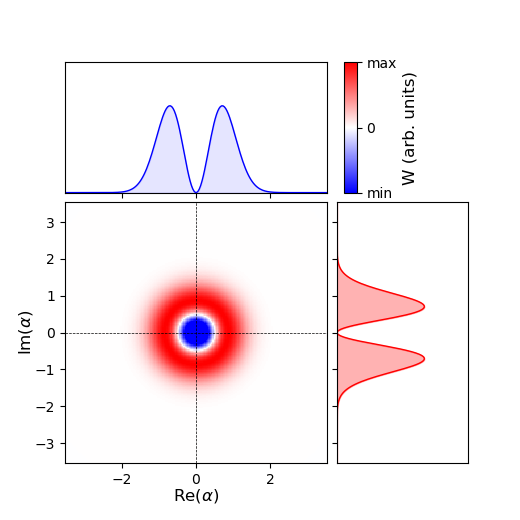

In [4]:
plot_wigner_photon(W_photon, xvec, xvec)

### Compute the electron Wigner function

In [ ]:
# Compute the exact electron Wigner function
Wigner_Fock, sidebands_axis, z_axis  = wigner_Fock(ene_photon,g0,nbar,method="numerical")
# Convolve with ZLP
Wigner_convolved, p_axis = wigner_spectral_convolve(Wigner_Fock, ene_photon, ZLP_width)
# Propagation after interaction
W_electron=wigner_propagate(Wigner_convolved, p_axis, ene_photon, prop_mm)

loop over Fock states[████████████████████████████████████████] 50/50 Est wait 00:00.00



### Plot the Wigner function together with the marginal distributions

/Users/lourenco/Documents/Académique/Recherche/02 - CR/Git_Codes/pyQIELS_v2/notebooks/src/plot_function.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[3, 1])

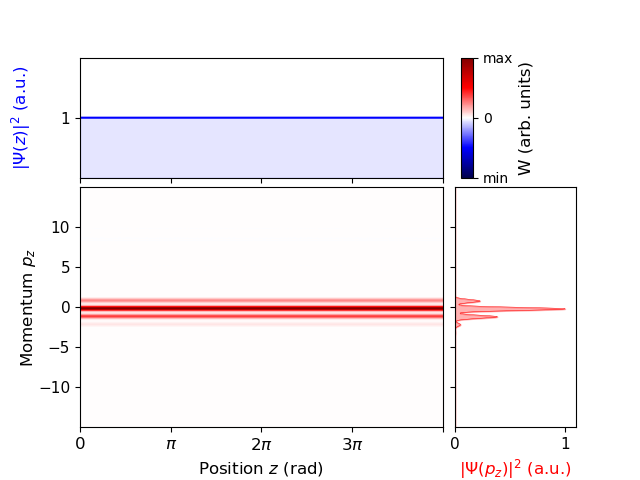

In [6]:
plot_wigner_electron(W_electron, p_axis, z_axis, ene_photon)